In [1]:
%matplotlib inline

import ast
import os
import sys
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator
from matplotlib.ticker import ScalarFormatter
from matplotlib.patches import Patch
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'
import matplotlib.gridspec as gridspec

from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker
import matplotlib
import seaborn as sns
from itertools import groupby
from scipy import integrate
from tqdm import tqdm
import cartopy.crs as ccrs
import cartopy


plt.style.use('ggplot')
pd.set_option('chained_assignment',None)

sys.path.append(os.path.join( '..'))
from miriam_py.utils import load_config
data_path = load_config()['paths']['data']

In [2]:
def sum_tuples(l):
    return tuple(sum(x) for x in zip(*l))

def calc_risk_total(x,hazard,RPS,events):
    collect_risks = []
    for y in range(7):
        collect_risks.append(integrate.simps([x[y] for x in x[events]][::-1], x=RPS[::-1]))
    return collect_risks

def set_prot_standard(x,prot_lookup,events):
    prot_stand = prot_lookup[x.region]
    no_floods= [z for z in events if prot_stand > int(z.split('-')[1])]
    for no_flood in no_floods:
        x[no_flood] = (0,0,0,0,0,0,0)
    return x

def pluvial_design_1up(x,hazard):
    if x.GroupCode == 'HIC':
        if x.road_type in ['primary','secondary']:
            if hazard == 'PU':
                x[['PU-5','PU-10','PU-20','PU-50','PU-75','PU-100']] = [(0,0,0,0,0,0,0)]*6
            elif hazard == 'FU':
                x[['FU-5','FU-10','FU-20','FU-50','FU-75','FU-100']] = [(0,0,0,0,0,0,0)]*6
            elif hazard == 'CF':
                x[['CF-10','CF-20','CF-50','CF-100']] = [(0,0,0,0,0,0,0)]*4               
        else:
            if hazard == 'PU':
                x[['PU-5','PU-10','PU-20','PU-50']] = [(0,0,0,0,0,0,0)]*4
            elif hazard == 'FU':
                x[['FU-5','FU-10','FU-20','FU-50']] = [(0,0,0,0,0,0,0)]*4
            elif hazard == 'CF':
                x[['CF-10','CF-20','CF-50']] = [(0,0,0,0,0,0,0)]*3
    elif x.GroupCode == 'UMC':
        if x.road_type in ['primary','secondary']:
            if hazard == 'PU':
                x[['PU-5','PU-10','PU-20','PU-50']] = [(0,0,0,0,0,0,0)]*4
            elif hazard == 'FU':
                x[['FU-5','FU-10','FU-20','FU-50']] = [(0,0,0,0,0,0,0)]*4
            elif hazard == 'CF':
                x[['CF-10','CF-20','CF-50']] = [(0,0,0,0,0,0,0)]*3
        else:
            if hazard == 'PU':
                x[['PU-5','PU-10','PU-20']] = [(0,0,0,0,0,0,0)]*3
            elif hazard == 'FU':
                x[['FU-5','FU-10','FU-20']] = [(0,0,0,0,0,0,0)]*3
            elif hazard == 'CF':
                x[['CF-10','CF-20']] = [(0,0,0,0,0,0,0)]*2
    else:
        if x.road_type in ['primary','secondary']:
            if hazard == 'PU':
                x[['PU-5','PU-10','PU-20']] = [(0,0,0,0,0,0,0)]*3
            elif hazard == 'FU':
                x[['FU-5','FU-10','FU-20']] = [(0,0,0,0,0,0,0)]*3
            elif hazard == 'CF':
                x[['CF-10','CF-20']] = [(0,0,0,0,0,0,0)]*2
        else:
            if hazard == 'PU':
                x[['PU-5','PU-10']] = [(0,0,0,0,0,0,0)]*2
            elif hazard == 'FU':
                x[['FU-5','FU-10']] = [(0,0,0,0,0,0,0)]*2
            elif hazard == 'CF':
                x[['CF-10']] = [(0,0,0,0,0,0,0)]*1
        
    return x

def pluvial_design_1up_old(x,hazard):
    if x.GroupCode == 'HIC':
        if x.road_type in ['primary','secondary']:
            if hazard == 'PU':
                x[['PU-5','PU-10','PU-20','PU-50','PU-75','PU-100','PU-200']] = [(0,0,0,0,0,0,0)]*7
            elif hazard == 'FU':
                x[['FU-5','FU-10','FU-20','FU-50','FU-75','FU-100','FU-200']] = [(0,0,0,0,0,0,0)]*7
            elif hazard == 'CF':
                x[['CF-10','CF-20','CF-50','CF-100','CF-200']] = [(0,0,0,0,0,0,0)]*5               
        else:
            if hazard == 'PU':
                x[['PU-5','PU-10','PU-20','PU-50','PU-75','PU-100']] = [(0,0,0,0,0,0,0)]*6
            elif hazard == 'FU':
                x[['FU-5','FU-10','FU-20','FU-50','FU-75','FU-100']] = [(0,0,0,0,0,0,0)]*6
            elif hazard == 'CF':
                x[['CF-10','CF-20','CF-50','CF-100']] = [(0,0,0,0,0,0,0)]*4
    elif x.GroupCode == 'UMC':
        if x.road_type in ['primary','secondary']:
            if hazard == 'PU':
                x[['PU-5','PU-10','PU-20','PU-50','PU-75','PU-100']] = [(0,0,0,0,0,0,0)]*6
            elif hazard == 'FU':
                x[['FU-5','FU-10','FU-20','FU-50','FU-75','FU-100']] = [(0,0,0,0,0,0,0)]*6
            elif hazard == 'CF':
                x[['CF-10','CF-20','CF-50','CF-100']] = [(0,0,0,0,0,0,0)]*4               
        else:
            if hazard == 'PU':
                x[['PU-5','PU-10','PU-20','PU-50']] = [(0,0,0,0,0,0,0)]*4
            elif hazard == 'FU':
                x[['FU-5','FU-10','FU-20','FU-50']] = [(0,0,0,0,0,0,0)]*4
            elif hazard == 'CF':
                x[['CF-10','CF-20','CF-50']] = [(0,0,0,0,0,0,0)]*3
    else:
        if x.road_type in ['primary','secondary']:
            if hazard == 'PU':
                x[['PU-5','PU-10','PU-20','PU-50']] = [(0,0,0,0,0,0,0)]*4
            elif hazard == 'FU':
                x[['FU-5','FU-10','FU-20','FU-50']] = [(0,0,0,0,0,0,0)]*4
            elif hazard == 'CF':
                x[['CF-10','CF-20','CF-50']] = [(0,0,0,0,0,0,0)]*3
        else:
            if hazard == 'PU':
                x[['PU-5','PU-10','PU-20']] = [(0,0,0,0,0,0,0)]*3
            elif hazard == 'FU':
                x[['FU-5','FU-10','FU-20']] = [(0,0,0,0,0,0,0)]*3
            elif hazard == 'CF':
                x[['CF-10','CF-20']] = [(0,0,0,0,0,0,0)]*2
    return x

def pluvial_design(x,hazard):
    if x.GroupCode == 'HIC':
        if x.road_type in ['primary','secondary']:
            if hazard == 'PU':
                x[['PU-5','PU-10','PU-20','PU-50']] = [(0,0,0,0,0,0,0)]*4
            elif hazard == 'FU':
                x[['FU-5','FU-10','FU-20','FU-50']] = [(0,0,0,0,0,0,0)]*4
            elif hazard == 'CF':
                x[['CF-10','CF-20','CF-50']] = [(0,0,0,0,0,0,0)]*3               
        else:
            if hazard == 'PU':
                x[['PU-5','PU-10','PU-20']] = [(0,0,0,0,0,0,0)]*3
            elif hazard == 'FU':
                x[['FU-5','FU-10','FU-20']] = [(0,0,0,0,0,0,0)]*3
            elif hazard == 'CF':
                x[['CF-10','CF-20']] = [(0,0,0,0,0,0,0)]*2
    elif x.GroupCode == 'UMC':
        if x.road_type in ['primary','secondary']:
            if hazard == 'PU':
                x[['PU-5','PU-10','PU-20']] = [(0,0,0,0,0,0,0)]*3
            elif hazard == 'FU':
                x[['FU-5','FU-10','FU-20']] = [(0,0,0,0,0,0,0)]*3
            elif hazard == 'CF':
                x[['CF-10','CF-20']] = [(0,0,0,0,0,0,0)]*2
        else:
            if hazard == 'PU':
                x[['PU-5','PU-10']] = [(0,0,0,0,0,0,0)]*2
            elif hazard == 'FU':
                x[['FU-5','FU-10']] = [(0,0,0,0,0,0,0)]*2
            elif hazard == 'CF':
                x[['CF-10']] = [(0,0,0,0,0,0,0)]*1
    else:
        if x.road_type in ['primary','secondary']:
            if hazard == 'PU':
                x[['PU-5','PU-10']] = [(0,0,0,0,0,0,0)]*2
            elif hazard == 'FU':
                x[['FU-5','FU-10']] = [(0,0,0,0,0,0,0)]*2
            elif hazard == 'CF':
                x[['CF-10']] = [(0,0,0,0,0,0,0)]*1
       
    return x

def get_value(x,ne_sindex,ne_countries,col):
    matches = ne_countries.loc[ne_sindex.intersection(x.centroid.bounds[:2])]
    
    for match in matches.iterrows():
        if match[1].geometry.intersects(x) == True:
            return match[1][col]

In [3]:
%%time
global_countries = gpd.read_file(os.path.join(data_path,'input_data','global_countries.shp'))
global_regions = gpd.read_file(os.path.join(data_path,'input_data','global_regions_v2.shp'))
prot_lookup = dict(zip(global_regions['GID_2'],global_regions['prot_stand']))
ne_countries = gpd.read_file(os.path.join(data_path,'input_data','ne_50m_admin_0_countries.shp'))
ne_sindex = ne_countries.sindex
incomegroups = pd.read_csv(os.path.join(data_path,'input_data','incomegroups_2018.csv'),index_col=[0])

Wall time: 9.51 s


In [4]:
wbccodes = pd.read_csv(os.path.join(data_path,'input_data','wbccodes2014.csv'),index_col=[0])
wbc_lookup = dict(zip(wbccodes.index,wbccodes.wbregion))
def wbregion(x):
    try:
        return wbc_lookup[x]
    except:
        return 'YHI'

In [5]:
%%time
events_FU = ['FU-5', 'FU-10', 'FU-20', 'FU-50', 'FU-75', 'FU-100', 'FU-200', 'FU-250','FU-500', 'FU-1000']
tot_road_FU = pd.read_csv(os.path.join(data_path,'summarized','FU_road_losses.csv'),
                          converters = dict(zip(events_FU,[ast.literal_eval]*len(events_FU))),index_col=[0]) 
print('FU loaded')

events_PU = ['PU-5', 'PU-10', 'PU-20', 'PU-50', 'PU-75', 'PU-100', 'PU-200', 'PU-250', 'PU-500', 'PU-1000']
tot_road_PU = pd.read_csv(os.path.join(data_path,'summarized','PU_road_losses.csv'),
                          converters = dict(zip(events_PU,[ast.literal_eval]*len(events_PU))),index_col=[0]) 
print('PU loaded')

events_CF = ['CF-10', 'CF-20', 'CF-50', 'CF-100', 'CF-200', 'CF-500', 'CF-1000']
tot_road_CF = pd.read_csv(os.path.join(data_path,'summarized','CF_road_losses.csv'),
                          converters = dict(zip(events_CF,[ast.literal_eval]*len(events_CF))),index_col=[0])

FU loaded
PU loaded
Wall time: 2min 32s


In [6]:
len(tot_road_PU.region.unique())

44405

In [7]:
tot_road_FU = tot_road_FU.merge(incomegroups,left_on='country',right_on='CountryCode').merge(global_countries[['ISO_3digit','wbregion']],left_on='country',right_on='ISO_3digit')
tot_road_PU = tot_road_PU.merge(incomegroups,left_on='country',right_on='CountryCode').merge(global_countries[['ISO_3digit','wbregion']],left_on='country',right_on='ISO_3digit')
tot_road_CF = tot_road_CF.merge(incomegroups,left_on='country',right_on='CountryCode').merge(global_countries[['ISO_3digit','wbregion']],left_on='country',right_on='ISO_3digit')

In [8]:
%%time
tqdm.pandas()
tot_road_FU_base = tot_road_FU.progress_apply(lambda x : set_prot_standard(x,prot_lookup,events_FU),axis=1)
tot_road_CF_base = tot_road_CF.progress_apply(lambda x : set_prot_standard(x,prot_lookup,events_CF),axis=1)
tot_road_FU_base = tot_road_FU_base.progress_apply(lambda x : pluvial_design(x,'FU'),axis=1)
tot_road_CF_base = tot_road_CF_base.progress_apply(lambda x : pluvial_design(x,'CF'),axis=1)
tot_road_PU_base = tot_road_PU.progress_apply(lambda x : pluvial_design(x,'PU'),axis=1)

100%|█████████████████████████████████████████████████████████████████████████| 173646/173646 [03:14<00:00, 890.73it/s]


Wall time: 7min 13s


In [9]:
%%time
tqdm.pandas()
tot_road_FU_1up = tot_road_FU.progress_apply(lambda x : set_prot_standard(x,prot_lookup,events_FU),axis=1)
tot_road_CF_1up = tot_road_CF.progress_apply(lambda x : set_prot_standard(x,prot_lookup,events_CF),axis=1)
tot_road_FU_1up = tot_road_FU_1up.progress_apply(lambda x : pluvial_design_1up(x,'FU'),axis=1)
tot_road_CF_1up = tot_road_CF_1up.progress_apply(lambda x : pluvial_design_1up(x,'CF'),axis=1)
tot_road_PU_1up = tot_road_PU.progress_apply(lambda x : pluvial_design_1up(x,'PU'),axis=1)

100%|████████████████████████████████████████████████████████████████████████| 173646/173646 [02:50<00:00, 1017.95it/s]


Wall time: 6min 51s


In [10]:
FU_wb_stats = tot_road_FU_base.loc[tot_road_FU.road_type.isin(['primary','secondary','tertiary'])]
FU_wb_stats = FU_wb_stats.groupby(['GroupName'])[events_FU].agg(sum_tuples)

PU_wb_stats = tot_road_PU_base.loc[tot_road_PU.road_type.isin(['primary','secondary','tertiary'])]
PU_wb_stats = PU_wb_stats.groupby(['GroupName'])[events_PU].agg(sum_tuples)

CF_wb_stats = tot_road_CF_base.loc[tot_road_CF.road_type.isin(['primary','secondary','tertiary'])]
CF_wb_stats = CF_wb_stats.groupby(['GroupName'])[events_CF].agg(sum_tuples)

FU_wb_stats_1up = tot_road_FU_1up.loc[tot_road_FU.road_type.isin(['primary','secondary','tertiary'])]
FU_wb_stats_1up= FU_wb_stats_1up.groupby(['GroupName'])[events_FU].agg(sum_tuples)

PU_wb_stats_1up = tot_road_PU_1up.loc[tot_road_PU.road_type.isin(['primary','secondary','tertiary'])]
PU_wb_stats_1up = PU_wb_stats_1up.groupby(['GroupName'])[events_PU].agg(sum_tuples)

CF_wb_stats_1up = tot_road_CF_1up.loc[tot_road_CF.road_type.isin(['primary','secondary','tertiary'])]
CF_wb_stats_1up = CF_wb_stats_1up.groupby(['GroupName'])[events_CF].agg(sum_tuples)

In [11]:
RPS = [1/5,1/10,1/20,1/50,1/75,1/100,1/200,1/250,1/500,1/1000]
wb_risk_PU = pd.DataFrame(PU_wb_stats.apply(lambda x: calc_risk_total(x,'PU',RPS,events_PU),axis=1).tolist(),index=PU_wb_stats.index,
     columns=['perc_0','perc_20','perc_40','perc_50','perc_60','perc_80','perc_100'])
wb_risk_PU_1up = pd.DataFrame(PU_wb_stats_1up.apply(lambda x: calc_risk_total(x,'PU',RPS,events_PU),axis=1).tolist(),index=PU_wb_stats_1up.index,
     columns=['perc_0','perc_20','perc_40','perc_50','perc_60','perc_80','perc_100'])

wb_risk_FU = pd.DataFrame(FU_wb_stats.apply(lambda x: calc_risk_total(x,'FU',RPS,events_FU),axis=1).tolist(),index=FU_wb_stats.index,
     columns=['perc_0','perc_20','perc_40','perc_50','perc_60','perc_80','perc_100'])
wb_risk_FU_1up = pd.DataFrame(FU_wb_stats_1up.apply(lambda x: calc_risk_total(x,'FU',RPS,events_FU),axis=1).tolist(),index=FU_wb_stats_1up.index,
     columns=['perc_0','perc_20','perc_40','perc_50','perc_60','perc_80','perc_100'])


RPS = [1/10,1/20,1/50,1/100,1/200,1/500,1/1000]
wb_risk_CF = pd.DataFrame(CF_wb_stats.apply(lambda x: calc_risk_total(x,'CF',RPS,events_CF),axis=1).tolist(),
                       index=CF_wb_stats.index,
     columns=['perc_0','perc_20','perc_40','perc_50','perc_60','perc_80','perc_100'])
wb_risk_CF_1up = pd.DataFrame(CF_wb_stats_1up.apply(lambda x: calc_risk_total(x,'CF',RPS,events_CF),axis=1).tolist(),
                       index=CF_wb_stats.index,
     columns=['perc_0','perc_20','perc_40','perc_50','perc_60','perc_80','perc_100'])

In [12]:
%%time
FU_reg_stats = tot_road_FU_base.loc[tot_road_FU.road_type.isin(['primary','secondary','tertiary'])]
FU_reg_stats = FU_reg_stats.groupby(['region'])[events_FU].agg(sum_tuples)

PU_reg_stats = tot_road_PU_base.loc[tot_road_PU.road_type.isin(['primary','secondary','tertiary'])]
PU_reg_stats = PU_reg_stats.groupby(['region'])[events_PU].agg(sum_tuples)

CF_reg_stats = tot_road_CF_base.loc[tot_road_CF.road_type.isin(['primary','secondary','tertiary'])]
CF_reg_stats = CF_reg_stats.groupby(['region'])[events_CF].agg(sum_tuples)

FU_reg_stats_1up = tot_road_FU_1up.loc[tot_road_FU.road_type.isin(['primary','secondary','tertiary'])]
FU_reg_stats_1up= FU_reg_stats_1up.groupby(['region'])[events_FU].agg(sum_tuples)

PU_reg_stats_1up = tot_road_PU_1up.loc[tot_road_PU.road_type.isin(['primary','secondary','tertiary'])]
PU_reg_stats_1up = PU_reg_stats_1up.groupby(['region'])[events_PU].agg(sum_tuples)

CF_reg_stats_1up = tot_road_CF_1up.loc[tot_road_CF.road_type.isin(['primary','secondary','tertiary'])]
CF_reg_stats_1up = CF_reg_stats_1up.groupby(['region'])[events_CF].agg(sum_tuples)

Wall time: 51.1 s


In [13]:
%%time
tqdm.pandas()
RPS = [1/5,1/10,1/20,1/50,1/75,1/100,1/200,1/250,1/500,1/1000]
reg_risk_PU = pd.DataFrame(PU_reg_stats.progress_apply(lambda x: calc_risk_total(x,'PU',RPS,events_PU),axis=1).tolist(),index=PU_reg_stats.index,
     columns=['perc_0','perc_20','perc_40','perc_50','perc_60','perc_80','perc_100'])
reg_risk_PU_1up = pd.DataFrame(PU_reg_stats_1up.progress_apply(lambda x: calc_risk_total(x,'PU',RPS,events_PU),axis=1).tolist(),index=PU_reg_stats_1up.index,
     columns=['perc_0','perc_20','perc_40','perc_50','perc_60','perc_80','perc_100'])

reg_risk_FU = pd.DataFrame(FU_reg_stats.progress_apply(lambda x: calc_risk_total(x,'FU',RPS,events_FU),axis=1).tolist(),index=FU_reg_stats.index,
     columns=['perc_0','perc_20','perc_40','perc_50','perc_60','perc_80','perc_100'])
reg_risk_FU_1up = pd.DataFrame(FU_reg_stats_1up.progress_apply(lambda x: calc_risk_total(x,'FU',RPS,events_FU),axis=1).tolist(),index=FU_reg_stats_1up.index,
     columns=['perc_0','perc_20','perc_40','perc_50','perc_60','perc_80','perc_100'])


RPS = [1/10,1/20,1/50,1/100,1/200,1/500,1/1000]
reg_risk_CF = pd.DataFrame(CF_reg_stats.progress_apply(lambda x: calc_risk_total(x,'CF',RPS,events_CF),axis=1).tolist(),
                       index=CF_reg_stats.index,
     columns=['perc_0','perc_20','perc_40','perc_50','perc_60','perc_80','perc_100'])
reg_risk_CF_1up = pd.DataFrame(CF_reg_stats_1up.progress_apply(lambda x: calc_risk_total(x,'CF',RPS,events_CF),axis=1).tolist(),
                       index=CF_reg_stats.index,
     columns=['perc_0','perc_20','perc_40','perc_50','perc_60','perc_80','perc_100'])

100%|█████████████████████████████████████████████████████████████████████████████| 6550/6550 [00:31<00:00, 205.86it/s]


Wall time: 17min 37s


In [14]:
reg_risk_PU.loc[reg_risk_PU.index == 'SDN_2_3_1']

,perc_0,perc_20,perc_40,perc_50,perc_60,perc_80,perc_100
region,,,,,,,
SDN_2_3_1,18418.994924,24730.076241,30050.749304,32639.863021,38826.730667,57374.538857,90837.501072


In [15]:
df_adapt_rel = pd.concat([pd.DataFrame(np.array((wb_risk_CF_1up-wb_risk_CF)/wb_risk_CF),columns=pd.MultiIndex.from_product([['perc_0','perc_20','perc_40','perc_50','perc_60','perc_80','perc_100'], ['Coastal Flooding']])),
pd.DataFrame(np.array((wb_risk_PU_1up-wb_risk_PU)/wb_risk_PU),columns=pd.MultiIndex.from_product([['perc_0','perc_20','perc_40','perc_50','perc_60','perc_80','perc_100'], ['Surface Flooding']])),
pd.DataFrame(np.array((wb_risk_FU_1up-wb_risk_FU)/wb_risk_FU),columns=pd.MultiIndex.from_product([['perc_0','perc_20','perc_40','perc_50','perc_60','perc_80','perc_100'], ['River Flooding']]))],axis=1)
df_adapt_rel = df_adapt_rel*-1
df_adapt_rel.index = ['High\nIncome','Low\nIncome','Lower Middle\nIncome','Upper Middle\nIncome']

df_adapt_abs = pd.concat([pd.DataFrame(np.array((wb_risk_CF_1up-wb_risk_CF)),columns=pd.MultiIndex.from_product([['perc_0','perc_20','perc_40','perc_50','perc_60','perc_80','perc_100'], ['Coastal Flooding']])),
pd.DataFrame(np.array((wb_risk_PU_1up-wb_risk_PU)),columns=pd.MultiIndex.from_product([['perc_0','perc_20','perc_40','perc_50','perc_60','perc_80','perc_100'], ['Surface Flooding']])),
pd.DataFrame(np.array((wb_risk_FU_1up-wb_risk_FU)),columns=pd.MultiIndex.from_product([['perc_0','perc_20','perc_40','perc_50','perc_60','perc_80','perc_100'], ['River Flooding']]))],axis=1)

df_adapt_abs = df_adapt_abs/-1000000
df_adapt_abs.index = ['High\nIncome','Low\nIncome','Lower Middle\nIncome','Upper Middle\nIncome']

In [16]:
df_reg = pd.concat([pd.DataFrame(reg_risk_CF.mean(axis=1),columns=['Coastal Flooding']),
pd.DataFrame(reg_risk_PU.mean(axis=1),columns=['Surface Flooding']),
pd.DataFrame(reg_risk_FU.mean(axis=1),columns=['River Flooding']),
pd.DataFrame(reg_risk_CF_1up.mean(axis=1),columns=['Coastal Flooding Up']),
pd.DataFrame(reg_risk_PU_1up.mean(axis=1),columns=['Surface Flooding Up']),
pd.DataFrame(reg_risk_FU_1up.mean(axis=1),columns=['River Flooding Up'])],axis=1,sort=True).fillna(0)

In [17]:
df_reg['baseline_all'] = df_reg['Coastal Flooding']+df_reg['Surface Flooding']+df_reg['River Flooding']
df_reg['1up_all'] = df_reg['Coastal Flooding Up']+df_reg['Surface Flooding Up']+df_reg['River Flooding Up']

In [18]:
df_reg['abs_increase'] = (df_reg['1up_all'] - df_reg['baseline_all'])*-1 
df_reg['rel_increase'] =((df_reg['1up_all'] - df_reg['baseline_all']) /  df_reg['baseline_all'])*-100

In [19]:
global_adapt = global_regions.merge(df_reg,left_on='GID_2',right_index=True,how='outer').fillna(0)
global_adapt = global_adapt.loc[~(global_adapt.geometry == 0)]
global_adapt['geometry'] = global_adapt.buffer(0.075)

In [20]:
df_adapt_abs = pd.concat([df_adapt_abs.iloc[1:,:], pd.DataFrame(df_adapt_abs.iloc[0,:]).T])
df_adapt_rel = pd.concat([df_adapt_rel.iloc[1:,:], pd.DataFrame(df_adapt_rel.iloc[0,:]).T])

In [21]:
(((wb_risk_CF_1up.sum()+wb_risk_PU_1up.sum()+wb_risk_FU_1up.sum())-(wb_risk_CF.sum()+wb_risk_PU.sum()+wb_risk_FU.sum()))/(wb_risk_CF.sum()+wb_risk_PU.sum()+wb_risk_FU.sum())).mean()

-0.5018817650040108

In [22]:
pd.concat(dict(zip(['CF','PU','FU'],[wb_risk_CF,wb_risk_PU,wb_risk_FU]))).to_csv(os.path.join(data_path,'output_data','wb_income_prot_base.csv'))

In [23]:
tot_glob = pd.DataFrame.from_dict({'perc_0':     4.450087e+09,
'perc_20':     6.798967e+09,
'perc_40':     1.033474e+10,
'perc_50':    1.254781e+10,
'perc_60':    1.531687e+10,
'perc_80':    2.233217e+10,
'perc_100':    3.685510e+10},orient='index')
tot_glob.columns = ['tot']

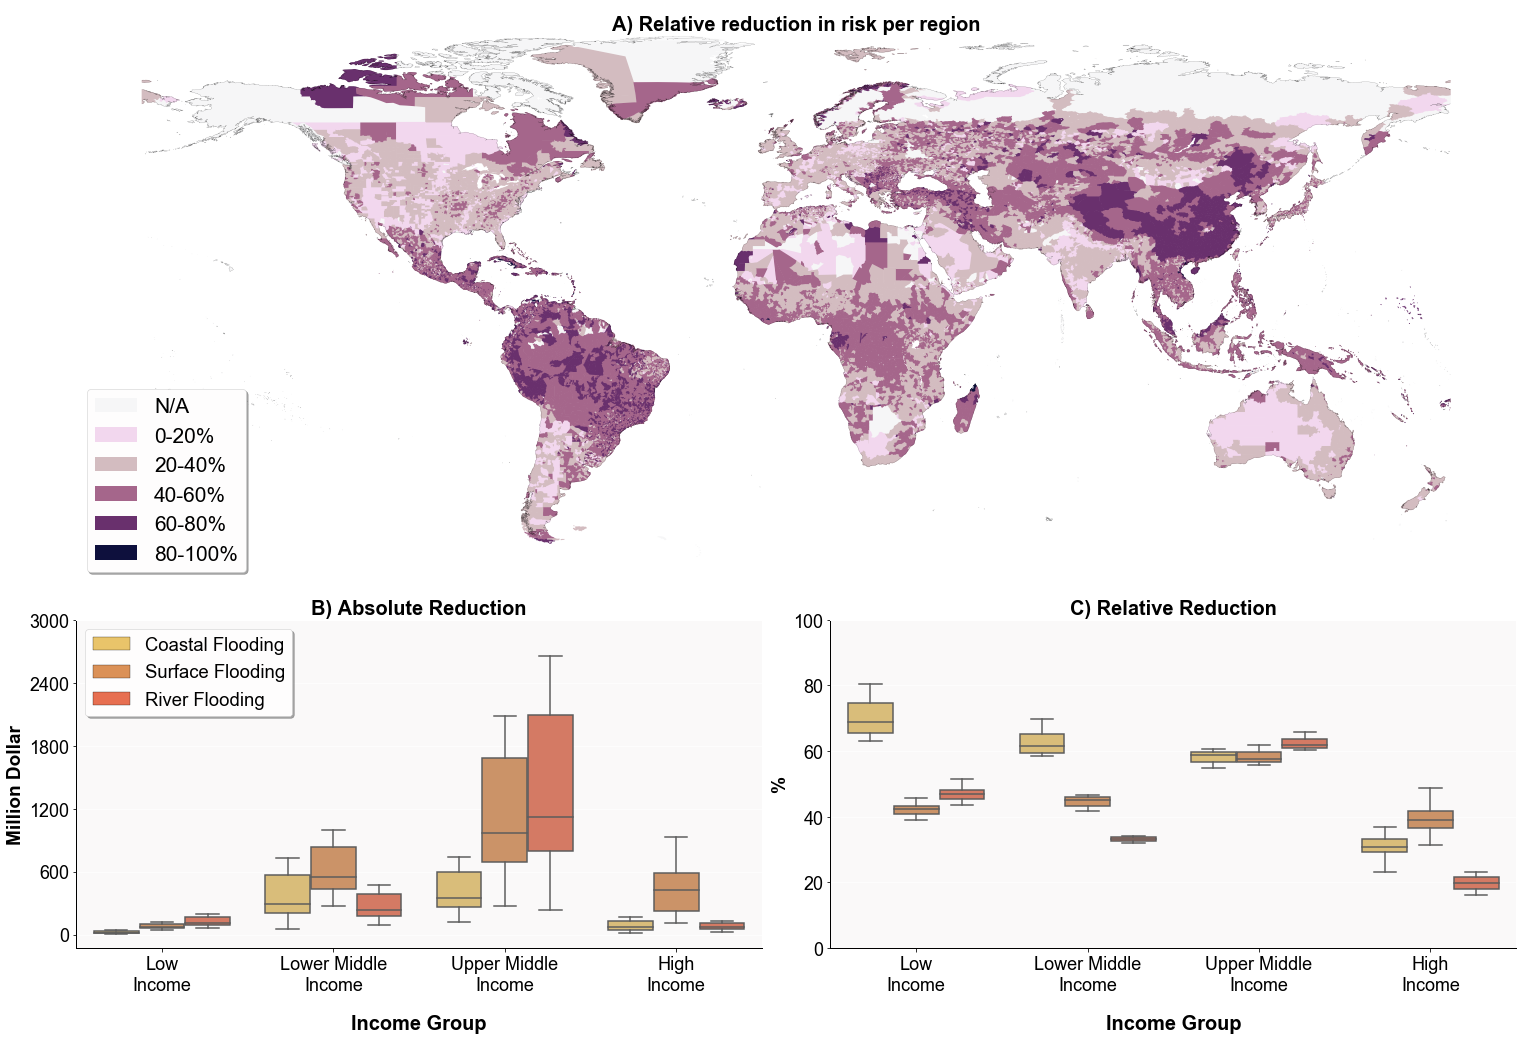

In [25]:
fig = plt.figure(figsize=(20,18))

gs = gridspec.GridSpec(3, 2)
gs.update(left=0.0, right=1, wspace=0.1,hspace=-0.01)

ax_gdp = plt.subplot(gs[:-1, :])
labels = [0,1,2,3,4,5]
label_names = ['N/A','0-20%','20-40%','40-60%','60-80%','80-100%']
color_scheme =  ['#F6F6F7','#F2D7EE','#D3BCC0','#A5668B','#69306D','#0E103D']
flatui = ['#E9C46A','#DB9157','#E76F51']
letters = ['A','B','C']

cmap = LinearSegmentedColormap.from_list(name='continents',
                                     colors=color_scheme)  

bins = [0,1,20,40,60,80,100]

coastlines = gpd.read_file(os.path.join(data_path,'input_data','ne_10m_coastline.shp'))
coastlines = coastlines.cx[-180:180, -50:90]
coastlines.plot(ax=ax_gdp,facecolor = 'none',edgecolor='black',linewidth=0.1)
global_adapt['rel_bin'] = pd.cut(global_adapt['rel_increase'], bins=bins, labels=labels).fillna(0)

global_adapt.plot(column='rel_bin',ax=ax_gdp,cmap=cmap,linewidth=0.0)

legend_elements = [Patch(facecolor=color_scheme[0],label=label_names[0]),
                  Patch(facecolor=color_scheme[1],label=label_names[1]),
                  Patch(facecolor=color_scheme[2],label=label_names[2]),
                  Patch(facecolor=color_scheme[3],label=label_names[3]),
                  Patch(facecolor=color_scheme[4],label=label_names[4]),
                  Patch(facecolor=color_scheme[5],label=label_names[5])]        

legend = ax_gdp.legend(handles=legend_elements, shadow=True, 
                   fancybox=True,facecolor='#fefdfd',prop={'size':21},loc='lower left') #

ax_gdp.set_xticks([])
ax_gdp.set_yticks([])
ax_gdp.patch.set_facecolor('white')

ax_gdp.text(0.5, 0.99, '{}) Relative reduction in risk per region'.format(letters[0]), transform=ax_gdp.transAxes,
            fontweight="bold",color='black', fontsize=20,    verticalalignment='top',horizontalalignment='center', 
            bbox= dict(boxstyle='round', facecolor='white', alpha=0.5,linewidth=0))
for iter_ in range(2):
    if iter_ == 0:
        ax = plt.subplot(gs[-1, :-1])

        df = pd.DataFrame(df_adapt_abs.unstack(1),columns=['Value']).reset_index()
        sns.boxplot(x=df.level_2,y=df.Value,hue=df.level_1,data=df,ax=ax,palette = sns.color_palette(flatui),showfliers=False)
        
        ax.yaxis.set_ticks(np.arange(0,3001,600))
        ax.set_xlabel(xlabel='Income Group',fontweight="bold",color='black',fontsize=20) 
        ax.set_ylabel(ylabel='Million Dollar',fontweight="bold",color='black',fontsize=19) #
        legend_elements = [Patch(facecolor=flatui[0],edgecolor='black',linewidth=0.3,label='Coastal Flooding'),
                           Patch(facecolor=flatui[1],edgecolor='black',linewidth=0.3,label='Surface Flooding'),
                           Patch(facecolor=flatui[2],edgecolor='black',linewidth=0.3,label='River Flooding')]        

        legend = ax.legend(handles=legend_elements, shadow=True, 
                                   fancybox=True,facecolor='#fefdfd',prop={'size':18.5},loc=2)    
        
        ax.set_title('{}) Absolute Reduction'.format(letters[iter_+1]),fontweight='bold',fontsize=20)

    if iter_ == 1:
        ax = plt.subplot(gs[-1, -1])

        df = pd.DataFrame(df_adapt_rel.unstack(1)*100 ,columns=['Value']).reset_index()
        sns.boxplot(x=df.level_2,y=df.Value,hue=df.level_1,data=df,ax=ax,palette = sns.color_palette(flatui),showfliers=False)
        
        ax.yaxis.set_ticks(np.arange(0,101,20))
        ax.set_xlabel(xlabel='Income Group',fontweight="bold",color='black',fontsize=20) 
        ax.set_ylabel(ylabel='%',fontweight="bold",color='black',fontsize=19) #
        ax.legend_.remove()
        ax.set_title('{}) Relative Reduction'.format(letters[iter_+1]),fontweight='bold',fontsize=20)
        
    ax.tick_params(axis = 'both',labelcolor='black',color='black',labelsize=18) #
    ax.set_facecolor('#f6f1f1')
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.get_xaxis().set_label_coords(0.5,-0.2)
    ax.set_facecolor('#FAF9F9')

plt.savefig(os.path.join(data_path,'Figures','Fig6_adaptation.png'), bbox_inches='tight')